# 3 Linear regression with multiple variables

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# %matplotlib notebook
%matplotlib inline

In [41]:
data = pd.read_csv('../data/ex1data2.txt', header=None)
data.columns = ['size', 'bedrooms', 'price']
data.head()
# data1.describe()
# data1.dtypes

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


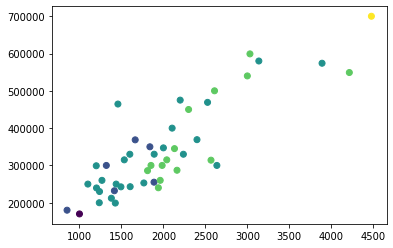

In [42]:
plt.scatter('size', 'price', data=data, c='bedrooms')

## 3.1 Feature Normalization

In [43]:
data = (data - data.mean())/data.std()

## 3.2 Gradient Descent

In [44]:
def getData(data):
    """
    get data from datafram, last column is the prediction.
    adds column of ones to X, as first column
    return: X.shape (data_points, features)
            y.shape (data_points, 1)
    """
    X = np.append(np.ones([data.shape[0],1]),data.iloc[:, :-1], axis=1)
    y = np.expand_dims(data.iloc[:, -1].values, axis=1)
    return X, y

In [45]:
def computeCost(X, y, theta):
    J = (((X.dot(theta)-y)**2).sum())/(2*len(y))
    return J

In [56]:
def gradientDescent(X, y, init_theta, alpha, iterations):
    theta = init_theta
    new_theta = init_theta # value not used
    J = np.zeros(iterations)
    for itr in range(iterations):
        J[itr] = computeCost(X, y, theta)
#         print("%.2f" % J[itr])
        for j in range(len(theta)):  
            new_theta[j] = theta[j] - (alpha/len(y))*(X.dot(theta)-y).T.dot(X[:,j])
        theta = new_theta
    return theta, J

[[-1.11730955e-16]
 [ 8.37127277e-01]
 [-6.87017134e-03]]
0.13172769915449137


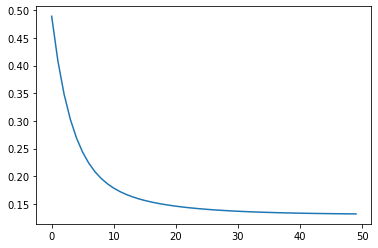

In [68]:
X,y = getData(data)
init_theta = np.zeros([X.shape[1],1])
# init_theta = np.random.rand(X.shape[1],1)
init_theta
alpha = 0.1
iterations = 50

theta, J = gradientDescent(X, y, init_theta, alpha, iterations)
print(theta)
print(J[-1])
plt.plot(range(iterations), J)

## 3.3 Normal Equations

In [72]:
def normalEqn(X, y):
    return (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)

In [77]:
theta_eqn = normalEqn(X, y)
print('diff in theta is: %.5f' % ((theta_eqn-theta)**2).sum())
print('optimal J is: %.5f' % (computeCost(X,y,theta_eqn)))

diff in theta is: 0.00441
optimal J is: 0.13069
